In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Load data
---

We'll use [Yahoo! Finance](https://finance.yahoo.com/quote/AAPL) to get a few years worth of stock prices from Apple, Inc. (AAPL)

In [4]:
# Load data
df = pd.read_csv("./datasets/aapl.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-08-08,206.050003,207.809998,204.520004,207.250000,201.371887,22525500
1,2018-08-09,209.529999,209.779999,207.199997,208.880005,202.955643,23492600
2,2018-08-10,207.360001,209.100006,206.669998,207.529999,202.351089,24611200
3,2018-08-13,209.309998,210.949997,207.699997,208.869995,203.657639,25890900
4,2018-08-14,210.160004,210.559998,208.259995,209.750000,204.515747,20748000


In [6]:
# Change date column to be datetime dtype
df['Date'] = pd.to_datetime(df.Date)

In [7]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-08-08,206.050003,207.809998,204.520004,207.250000,201.371887,22525500
1,2018-08-09,209.529999,209.779999,207.199997,208.880005,202.955643,23492600
2,2018-08-10,207.360001,209.100006,206.669998,207.529999,202.351089,24611200
3,2018-08-13,209.309998,210.949997,207.699997,208.869995,203.657639,25890900
4,2018-08-14,210.160004,210.559998,208.259995,209.750000,204.515747,20748000


## Set the `Date` column to be the index
---

We'll be exploring a few `pandas` methods related to time series data. In order for them to work we need to set the `Date` column to be the index.

In [10]:
# Set Date to be in the index
df.set_index('Date', drop=True, inplace=True)

In [13]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-08-08,206.050003,207.809998,204.520004,207.250000,201.371887,22525500
2018-08-09,209.529999,209.779999,207.199997,208.880005,202.955643,23492600
2018-08-10,207.360001,209.100006,206.669998,207.529999,202.351089,24611200
2018-08-13,209.309998,210.949997,207.699997,208.869995,203.657639,25890900
2018-08-14,210.160004,210.559998,208.259995,209.750000,204.515747,20748000


In [15]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-08-03,432.799988,446.549988,431.570007,435.750000,434.965759,77037800
2020-08-04,436.529999,443.160004,433.549988,438.660004,437.870514,43267900
2020-08-05,437.510010,441.570007,435.589996,440.250000,439.457642,30498000
2020-08-06,441.619995,457.649994,439.190002,455.609985,454.790009,50607200
2020-08-07,452.820007,454.700012,441.170013,444.450012,444.450012,49453300


In [12]:
# Sort the index
df.sort_index(inplace=True )

## Explore the data
---

- `Close`: The price of AAPL when the stock market closes (at 4:30pm ET)
- `Adj Close`: The closing price, when accounting for dividend payments, stock splits, etc.
- `High`: The highest price of AAPL during that trading day
- `Low`: The lowest price of AAPL during that trading day
- `Open`: The price of AAPL when the stock market opens (at 9:30am ET)
- `Volume`: How many shares of AAPL were traded that day

## Filtering by dates
---

Now that our `Date` column is the index, we can filter our data in unique ways. Try `df['2018']` in the cell below:

In [17]:
df['2018'].tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-24,148.149994,151.550003,146.589996,146.830002,143.665421,37169200
2018-12-26,148.300003,157.229996,146.720001,157.169998,153.782547,58582500
2018-12-27,155.839996,156.770004,150.070007,156.149994,152.784531,53117100
2018-12-28,157.500000,158.520004,154.550003,156.229996,152.862808,42291400
2018-12-31,158.529999,159.360001,156.479996,157.740005,154.340271,35003500


You can also filter by month:

In [23]:
df['2018-08'].head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-08-08,206.050003,207.809998,204.520004,207.250000,201.371887,22525500
2018-08-09,209.529999,209.779999,207.199997,208.880005,202.955643,23492600
2018-08-10,207.360001,209.100006,206.669998,207.529999,202.351089,24611200
2018-08-13,209.309998,210.949997,207.699997,208.869995,203.657639,25890900
2018-08-14,210.160004,210.559998,208.259995,209.750000,204.515747,20748000


In [26]:
ts = np.random.random(1000)

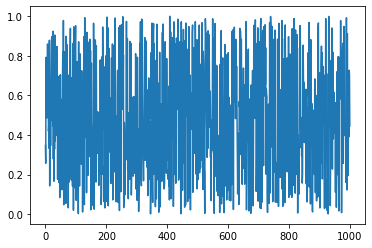

In [28]:
plt.plot(ts)

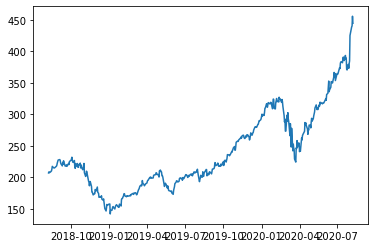

In [29]:
plt.plot(df.Close)

## Resampling
---

`df.resample()` is similar to `df.groupby()`, but with dates instead of categories.

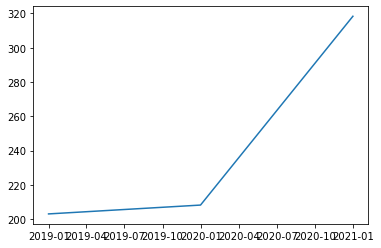

In [35]:
plt.plot(df.resample('Y').Close.mean())

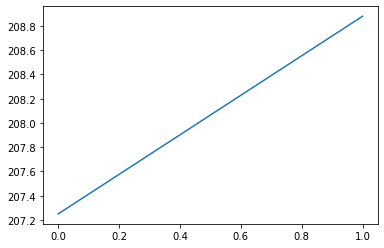

In [36]:
plt.plot([df.Close[0], df.Close[1]])

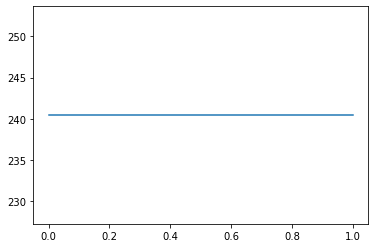

In [38]:
plt.plot([df.Close.mean(), df.Close.mean() ])

## Lookup challenge
---

Where can you find all the resample options?

In [ ]:
df.resample()

## Rolling
---

With time series, we can "roll" statistics across time. For example, the rolling mean is the mean of a moving window across time periods. Pandas offers a variety of methods for creating rolling statistics, which we'll only scratch the surface of here. 

The syntax for these can be a little tricky at first. We'll be using a `rolling()` method with a statistical function chained to it. 

In [42]:
df.head(15)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-08-08,206.050003,207.809998,204.520004,207.250000,201.371887,22525500
2018-08-09,209.529999,209.779999,207.199997,208.880005,202.955643,23492600
2018-08-10,207.360001,209.100006,206.669998,207.529999,202.351089,24611200
2018-08-13,209.309998,210.949997,207.699997,208.869995,203.657639,25890900
2018-08-14,210.160004,210.559998,208.259995,209.750000,204.515747,20748000
2018-08-15,209.220001,210.740005,208.330002,210.240005,204.993484,28807600
2018-08-16,211.750000,213.809998,211.470001,213.320007,207.996643,28500400
2018-08-17,213.440002,217.949997,213.160004,217.580002,212.150299,35427000
2018-08-20,218.100006,219.179993,215.110001,215.460007,210.083221,30287700


In [52]:
df_r5 = df.rolling(125).mean()

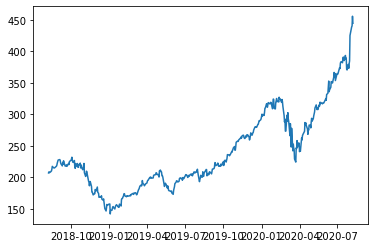

In [53]:
plt.plot(df.Close)

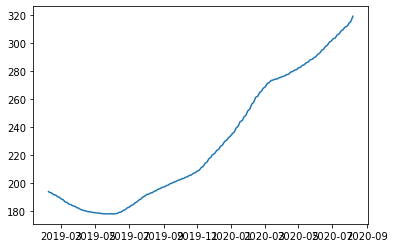

In [54]:
plt.plot(df_r5.Close)

In [56]:
df.Close.shape[0]

504

## Challenge
---

Plot a line chart with two lines:
1. The `Open` price
2. The 30 day rolling mean of the `Open` price

## `.diff()`
---
The `.diff()` calculates the difference in a value between a value at time $T$ and that same value at $T-1$. For example, if I have a dataframe of stock prices:

<table style="float: left;">
  <thead>
    <tr>
      <th></th>
      <th>Close</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1-1-2019</th>
      <td>100</td>
    </tr>
    <tr>
      <th>1-2-2019</th>
      <td>110</td>
    </tr>
  </tbody>
</table>

<div style="clear: both;"></div>

When I call `.diff()`, I get the following:
<table style="float: left;">
  <thead>
    <tr>
      <th></th>
      <th>Close</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1-1-2019</th>
      <td>NaN</td>
    </tr>
    <tr>
      <th>1-2-2019</th>
      <td>10</td>
    </tr>
  </tbody>
</table>
<div style="clear: both;"></div>


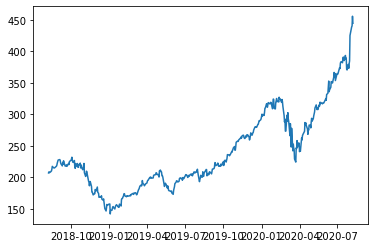

In [58]:
plt.plot(df.Close)

In [57]:
df.Close.diff(1)

Date
2018-08-08          NaN
2018-08-09     1.630005
2018-08-10    -1.350006
2018-08-13     1.339996
2018-08-14     0.880005
                ...    
2020-08-03    10.709991
2020-08-04     2.910004
2020-08-05     1.589996
2020-08-06    15.359985
2020-08-07   -11.159973
Name: Close, Length: 504, dtype: float64

## `.pct_change()` 
---

`.pct_change()` works similar to `.diff()`, except we're calculating the difference as a change in percentage: $X_{t}/X_{t-1} - 1$

So if I have my table of stock prices:

<table style="float: left;">
  <thead>
    <tr>
      <th></th>
      <th>Close</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1-1-2019</th>
      <td>100</td>
    </tr>
    <tr>
      <th>1-2-2019</th>
      <td>110</td>
    </tr>
  </tbody>
</table>

<div style="clear: both;"></div>

The `.pct_change()` will look like this:

<table style="float: left;">
  <thead>
    <tr>
      <th></th>
      <th>Close</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1-1-2019</th>
      <td>NaN</td>
    </tr>
    <tr>
      <th>1-2-2019</th>
      <td>.1</td>
    </tr>
  </tbody>
</table>

<div style="clear: both;"></div>


We'd interpret 1-2-2019 as a 10% increase (110/100 - 1 = .10) in price from the day before. Again, the first row is a `NaN` since there is no prior row to calcuate the percent change from.

In [67]:
df.Close.pct_change(1)

Date
2018-08-08         NaN
2018-08-09    0.007865
2018-08-10   -0.006463
2018-08-13    0.006457
2018-08-14    0.004213
                ...   
2020-08-03    0.025198
2020-08-04    0.006678
2020-08-05    0.003625
2020-08-06    0.034889
2020-08-07   -0.024495
Name: Close, Length: 504, dtype: float64

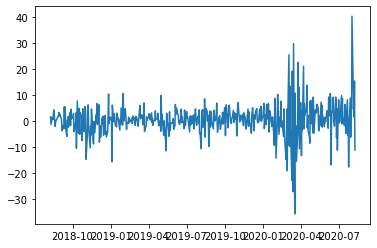

In [66]:
plt.plot(df.Close.diff(1))

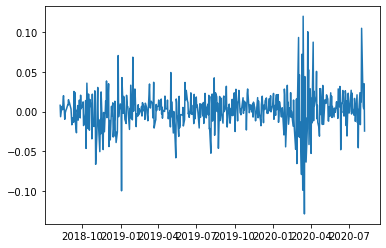

In [68]:
plt.plot(df.Close.pct_change(1))

## Challenge
---

Create three **separate** plots:
1. One for the `Close` price
2. One for the `Close` price, using `.diff()`
3. One for the `Close` price as a percent change.

What happens to your overall data when you diff?

[Why would we difference?](https://otexts.com/fpp2/stationarity.html) Well, there is one assumption that is **required** for nearly every time series model: **stationarity**.
- If our time series is stationary, then we do not need to difference
- If our time series is not stationary, then we difference either once (`df.diff()`) or twice (`df.diff().diff()`). Differenced data often is stationary, so we difference our data, then model that!

## What is stationarity?
---

Informally, stationarity means that there **aren't systematic changes in our time series over time**.
- Our mean stays the same. (There is no trend.)
- The autocorrelation between $Y_t$ and $Y_{t-k}$ depends only on the size of our lag $k$. (There is no seasonality.)
- A [white noise process](https://stats.stackexchange.com/questions/7070/what-is-a-white-noise-process) is a common example of a stationary time series.

The problem is, many time series **aren't** stationary.
- The amount that stock prices vary on a day-to-day basis aren't going to be the same.
- Crop prices may increase or decrease over time; assuming a constant mean here doesn't make sense.


## Shifting
---

`df.shift()` is used to bring values from previous dates forward in time.

In [75]:
pd.concat([df.Close, df.Close.shift(1)], axis=1)

,Close,Close
Date,,
2018-08-08,207.250000,NaN
2018-08-09,208.880005,207.250000
2018-08-10,207.529999,208.880005
2018-08-13,208.869995,207.529999
2018-08-14,209.750000,208.869995
...,...,...
2020-08-03,435.750000,425.040009
2020-08-04,438.660004,435.750000
2020-08-05,440.250000,438.660004


In [80]:
pd.concat([df.Close, df.Close.shift(365)], axis=1)[1:].corr()

,Close,Close
Close,1.000000,-0.709077
Close,-0.709077,1.000000


## Creating a simple dataset
---

Let's create a simple dataset that tries to predict today's `Close` price using yesterday's `Close` price with today's `Open` price. 

**NOTE:** Remember we want stationarity!

In [81]:
df['close_shift'] = df.Close.shift(1)
df['open_target'] = df.Open.shift(-1)
predict_df = df[['close_shift','Open','open_target']][1:]
predict_df

,close_shift,Open,open_target
Date,,,
2018-08-09,207.250000,209.529999,207.360001
2018-08-10,208.880005,207.360001,209.309998
2018-08-13,207.529999,209.309998,210.160004
2018-08-14,208.869995,210.160004,209.220001
2018-08-15,209.750000,209.220001,211.750000
...,...,...,...
2020-08-03,425.040009,432.799988,436.529999
2020-08-04,435.750000,436.529999,437.510010
2020-08-05,438.660004,437.510010,441.619995


In [89]:
lightning = ["Stephanie",
"Lucus",
"Allen",
"Chin Xia",
"Tresha",
"Edward",
"Dale",
"Kun Won",
"Thomas",
"Derrick",
"Dave",
"Mark",
"Lloyd",
"Jean",
"Clarence"]
np.random.shuffle(lightning)

In [90]:
lightning

['Derrick',
 'Edward',
 'Thomas',
 'Chin Xia',
 'Tresha',
 'Allen',
 'Stephanie',
 'Mark',
 'Dale',
 'Clarence',
 'Lucus',
 'Lloyd',
 'Dave',
 'Jean',
 'Kun Won']